In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import os


import cv2

In [2]:
# preprocess image
def preprocessImg(img, new_width=30, new_height=30): # if the size is too big, a memory overflow will occur when calculating covariance
    new_dim = (new_width, new_height)
    resized_img = cv2.resize(img, new_dim, interpolation=cv2.INTER_LINEAR)
    blurred_img = cv2.GaussianBlur(resized_img, (5, 5), 0) # apply Gausian blur
    return blurred_img

In [3]:
def PCA(data, n_components=3):
    mean_vector = np.mean(data, axis=0) # calculate the mean of each column
    std_vector = np.std(data, axis=0) # calculate standard deviation of each column
    
    
    # normalize here
    centered_data = data - mean_vector # center data by subtracting mean
    standardized_data = centered_data / std_vector
    
    
    
    cov = np.cov(standardized_data.T) # caluculate covariance matrix of centered matrix (np.cov calculates covariance of rows, thus need transpose)
    eig_values, eig_vectors = np.linalg.eig(cov) # get eigenvalues and eigenvectors
    
    
    max_indexes = []
    for i in range(0, n_components):
        maxIndex = np.argmax(eig_values)
        max_indexes.append(maxIndex)
        eig_values[maxIndex] = 0
         
    # final_features = np.empty(0)
    final_features = eig_vectors[:, max_indexes]
   # print(len(final_features))
    
    projected_data = (np.dot(standardized_data, final_features))
    #projected_data = (np.dot(eig_vectors.T, cov.T)).T # return projected data matrix
    
    return projected_data

In [4]:
class K_means:
    
    def __init__(self, n_clusters=2, tol=0.0001, max_iter=300):
        self.n_clusters = n_clusters
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data, initial_centroids):
        self.centroids = {}
        for i in range(self.n_clusters):
            self.centroids[i] = data[initial_centroids[i]]

        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.n_clusters):
                self.classifications[i] = []


            for datapoint in data:
                distances = [np.linalg.norm(datapoint - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(datapoint)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                centroidMovement = np.sum((current_centroid - original_centroid) / original_centroid * 100.0)
                if centroidMovement > self.tol:
                    optimized = False

            if optimized:
                break
                
                
    def predict(self, datapoint):
        distances = [np.linalg.norm(datapoint - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

Start to read red mango data(you need to do PCA by yourself)

In [5]:
imgSet = []

In [6]:
path='./sum/green/'
files=os.listdir(path)

In [7]:
##############  your turn  , do PCA  ##############

#sklearn is not allow!! you need to implement  function step by step
##############  PCA  RULES   #################
###  for drawing 3D graph  , you should make dimension =3
### On calculating accuracy , you can set any dimension 
# hint ~ you can save the PCA result to the list ,train_red
for file in files:
    
    p=path+file
    img = cv2.imread(p)

    preprocessed_img = preprocessImg(img)
    imgVector = preprocessed_img.flatten(order='C')
    imgSet.append(imgVector)
    
    


Start to read green mango data(you need to do PCA by yourself)

In [8]:
##############  your turn  , do PCA  ##############

#sklearn is not allow!! you need to implement kmeans function step by step
##############  PCA  RULES   #################

###  for drawing 3D graph  , you should make dimension =3
### On calculating accuracy , you can set any dimension 
# hint ~ you can save the PCA result to the list ,train_green


path='./sum/red/'
files=os.listdir(path)

for file in files:
    
    p=path+file
    img = cv2.imread(p)

    preprocessed_img = preprocessImg(img)
    imgVector = preprocessed_img.flatten(order='C')
    imgSet.append(imgVector)
    

    



In [9]:
imgSet = np.asarray(imgSet)

transformed_data = PCA(imgSet)
transformed_data = transformed_data.astype(float)
print(len(transformed_data))
print(len(transformed_data[0]))

72
3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


show the PCA result 

this is the correct answer of your kmeans 


in the other words,your kmeans result need to as similar to this one as possible 

In [10]:
xx=[]
yy=[]
zz=[]
for i in range(36):
    xx.append(transformed_data[i][0])
    yy.append(transformed_data[i][1])
    zz.append(transformed_data[i][2])

In [11]:
xxx=[]
yyy=[]
zzz=[]
for i in range(36,72):
    xxx.append(transformed_data[i][0])
    yyy.append(transformed_data[i][1])
    zzz.append(transformed_data[i][2])

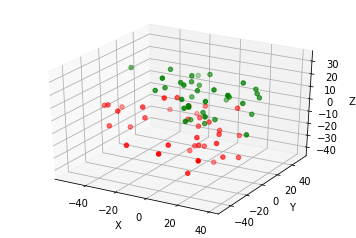

In [12]:
from mpl_toolkits.mplot3d import Axes3D



# x, y, z = data[0], data[1], data[2]
ax = plt.subplot(111, projection='3d')  

ax.scatter(xx, yy, zz, c='g')
ax.scatter(xxx, yyy, zzz, c='r')

ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

start to do your kmeans!

In [13]:
#put all the mango data to total_train
#you need to cluster total_train
#Finally,your kmeans result should show which mango point is red mango or green mango

#1-36 is green data 
#37-72 is red data
#don't alter this order

#total_train=train_green+train_red

In [14]:
transformed_data = PCA(imgSet, n_components=3)
transformed_data = transformed_data.astype(float)

K_means_model = K_means()
K_means_model.fit(transformed_data, [36, 12])
class1 = []
class2 = []


for datapoint in transformed_data:
    if K_means_model.predict(datapoint) == 0: # is red
        class1.append(datapoint)

    else:
        class2.append(datapoint)     # is green

del K_means_model
        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


this is your kmeans result!

In [15]:
#you need to show me your kmeans result in 3D picture like the result in video !



In [16]:
rxx=[]
ryy=[]
rzz=[]
for i in class1:
    rxx.append(i[0])
    ryy.append(i[1])
    rzz.append(i[2])

In [17]:
rxxx=[]
ryyy=[]
rzzz=[]
for i in class2:
    rxxx.append(i[0])
    ryyy.append(i[1])
    rzzz.append(i[2])

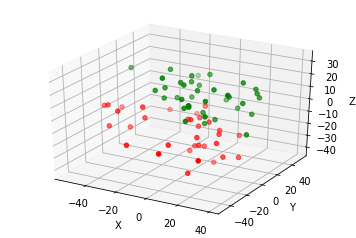

In [18]:
from mpl_toolkits.mplot3d import Axes3D


ax = plt.subplot(111, projection='3d') 

ax.scatter(rxx, ryy, rzz, c='r')
ax.scatter(rxxx, ryyy, rzzz, c='g')

ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

Here is the code which calculate the accuracy of your kmeans result

In [19]:
#Do your best to improve accuracy.but don't cheat by looking answer and make pred by yourself 

In [20]:
# total_train have 72 mango data
#1~36 is green mango
#37~72 is red mango
#so the correct classification answer of  mango is  ans = [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]
#1 is green
#0 is red

In [21]:
# At here ! you need to show me your kmeans result in  the list  ,pred=[]
#for example,pred may be   pred=[0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#in this case,the accuracy is 0.7  .  
#6 error , 14 correct  ,  14/20= 0.7 

In [22]:
transformed_data = PCA(imgSet, n_components=9) # use 9 features
transformed_data = transformed_data.astype(float)

K_means_model = K_means()
K_means_model.fit(transformed_data, [42, 19])
pred = []

for datapoint in transformed_data:
    if K_means_model.predict(datapoint) == 0: # is red
        pred.append(0)
    else:    # is green
        pred.append(1)

pred = np.array(pred)
del K_means_model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [23]:
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
pred=np.array(pred)

In [25]:
correct=0
error=0
ans = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
for i in range(72):
    if ans[i]==pred[i]:
        correct+=1
    if ans[i]!=pred[i]:
        error+=1

In [26]:
accuracy=correct/72

In [27]:
accuracy

1.0

submit your pred=[......] to kaggle and look your rank